# Fitting

Fitting that's currently used

In [145]:
from numpy import frompyfunc, linspace, sqrt, exp, log, pi, zeros, arange
from mpmath import polylog
from scipy.integrate import quad
from pylab import cm
from matplotlib.ticker import AutoMinorLocator

# Specific treatment for polylogarithm function
plog = frompyfunc(polylog, 2, 1)

# Call plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

# Generate 2 colors from the 'Set1' colormap
colors = mpl.colormaps['tab10'](2)

infty = 100
T = 300 #Temperature in K
kB = 0.00008617 #Bolztman constant in eV/K
kBT = kB*T
f = 10 #Conduction 17.40867685
Deltac = 0.01 #Conduction -0.08040215
a = 17 #mexican 17
b = 5000 #5000
#a = 7.2
#b = 690
d = 0.03 #Mexican 0.03
db = d/kBT
Dc = Deltac/kBT
E0 = (a**2)/(4*b*kBT) + db

In [146]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import sys

#This function extracts the high symmetry points from the output of bandx.out
def Symmetries(fstring): 
  f = open(fstring,'r')
  x = np.zeros(0)
  for i in f:
    if "high-symmetry" in i:
      x = np.append(x,float(i.split()[-1]))
  f.close()
  return x
# This function takes in the datafile, the fermi energy, the symmetry file, a subplot, and the label
# It then extracts the band data, and plots the bands, the fermi energy in red, and the high symmetry points
def bndplot(datafile,fermi,symmetryfile,subplot,**kwargs):
  ## necessary:
  # datafile is the bands.dat.gnu file generated from band.x
  # fermi is the Fermi energy
  # symmetryfile is the standard output file of band.x (bands.pp.out)
  # subplot is the axes that you want to plot the band on

  ## optional:
  # use name_k_points=['L','G','X','U','G'] where G is Gamma point to label the high symmetry points. It must have the same length as the variable 'temp'
  # use shift_fermi=1 to shift the Fermi energy to zero
  # use color='black' to manually set the color of the band structure plot. Useful to plot two band structure together for comparison
  # use linestyle='dashed' to manually set the linestyle of the band structure plot. Useful to plot two band structure together for comparison
  # use range=[-5,5] to set the energy range for plotting the band structure
  # use legend='Si, PBE' to set the legend of the bands

  if 'shift_fermi' in kwargs:
    bool_shift_efermi = kwargs['shift_fermi']
  else:
    bool_shift_efermi = 0
  if 'color' in kwargs:
    color_bnd=kwargs['color']
  else:
    color_bnd='black'
  if 'linestyle' in kwargs:
    line_bnd=kwargs['linestyle']
  else:
    line_bnd='solid'
  
  z = np.loadtxt(datafile) #This loads the bandx.dat.gnu file
  x = np.unique(z[:,0]) #This is all the unique x-points
  bands = []
  bndl = len(z[z[:,0]==x[1]]) #This gives the number of bands in the calculation
  Fermi = float(fermi)
  if bool_shift_efermi:
    fermi_shift=Fermi
  else:
    fermi_shift=0
  axis = [min(x),max(x)]
  for i in range(0,bndl):
    bands.append(np.zeros([len(x),2])) #This is where we storre the bands
  for i in range(0,len(x)):
    sel = z[z[:,0] == x[i]]  #Here is the energies for a given x
    test = []
    for j in range(0,bndl): #This separates it out into a single band
      bands[j][i][0] = x[i]
      #bands[j][i][1] = np.multiply(sel[j][1],13.605698066)
      bands[j][i][1] = sel[j][1]
  for i in bands: #Here we plots the bands
    subplot.plot(i[:,0],i[:,1]-fermi_shift,color=color_bnd,linestyle=line_bnd)
  if 'legend' in kwargs:
    #empty plot to generate legend
    subplot.plot([None],[None],color=color_bnd,linestyle=line_bnd,label=kwargs['legend'])
  temp = Symmetries(symmetryfile)
  for j in temp: #This is the high symmetry lines
    x1 = [j,j]
    #x2 = [fermi-10,fermi+10]
    #subplot.plot(x1,x2,'--',lw=0.55,color='black',alpha=0.75)
    subplot.axvline(x=j,linestyle='solid',color='gray',alpha=0.5)
  subplot.plot([min(x),max(x)],[Fermi-fermi_shift,Fermi-fermi_shift],color='red',linestyle='dotted')
  subplot.set_xticks(temp)
  subplot.set_xticklabels([])
  if 'name_k_points' in kwargs:
    if len(kwargs['name_k_points'])==len(temp):
      subplot.set_xticklabels(kwargs['name_k_points'])
  if 'range' in kwargs:
    range_plot=kwargs['range']
    subplot.set_ylim([range_plot[0],range_plot[1]])
  subplot.set_xlim([axis[0],axis[1]])
  subplot.set_xlabel('k')
  subplot.set_ylabel('energy (eV)')
  if 'legend' in kwargs:
    subplot.legend()
  return bands

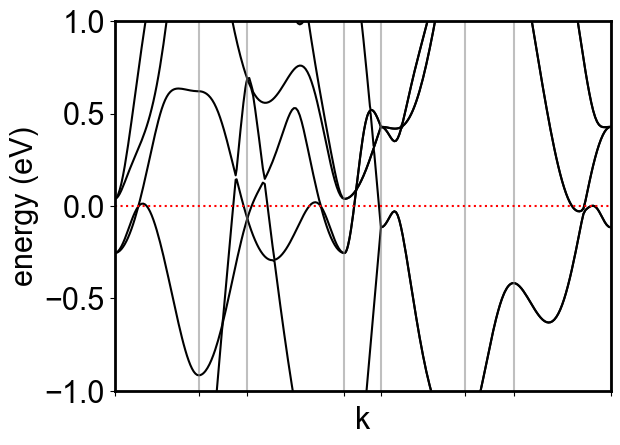

In [147]:
datafile='TiS.bands.gnu'
fermi = 13.1455
#fermi = 7.5
symmetryfile='TiS.bands.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
band = bndplot(datafile,fermi,symmetryfile,ax,shift_fermi=bool_shift_efermi,color='black',linestyle='solid',range=[-1,1])

#kc = band[19][:,0]
#Ekc = band[19][:,1]
#kv = band[18][:,0]
#Ekv = band[18][:,1]

kv = band[17][:, 0][58:124]
Ekv = band[17][:, 1][58:124]
kc = band[18][:, 0][58:124]
Ekc = band[18][:, 1][58:124]

#kvv = np.append(kv[100:150]-1.574,kv[0:50])
#Ekvv = np.append(Ekv[100:150],Ekv[0:50])
#kcc = np.append(kc[100:150]-1.574,kc[0:50])
#Ekcc = np.append(Ekc[100:150],Ekc[0:50])

apnd_v=np.append(kv[22:30]-0.9107,kc[32:50]-0.9107)
kvv=np.append(apnd_v,kv[51:56]-0.9107)
apnd_Ev=np.append(Ekv[22:30],Ekc[32:50])
Ekvv=np.append(apnd_Ev,Ekv[51:56])

apnd_c=np.append(kc[17:30]-0.9107,kv[32:50]-0.9107)
kcc=np.append(apnd_c,kc[52:61]-0.9107)
apnd_Ec=np.append(Ekc[17:30],Ekv[32:50])
Ekcc=np.append(apnd_Ec,Ekc[52:61])

Text(0, 0.5, 'Energy(eV)')

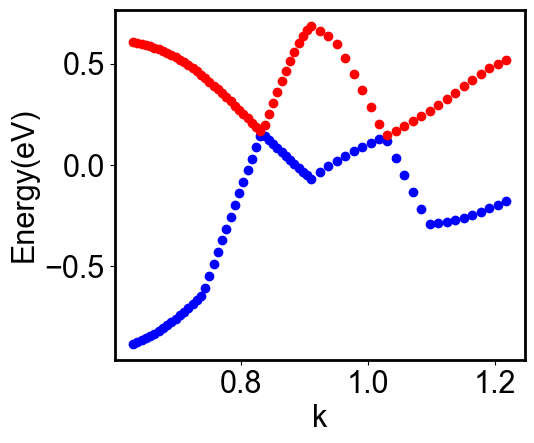

In [148]:
fig=plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,3,1)
ax.scatter(kv, Ekv-fermi, color='blue', label='Band 15')
ax.scatter(kc, Ekc-fermi, color='red', label='Band 16')
ax.set_xlabel('k')
ax.set_ylabel('Energy(eV)')
#ax.set_xlim(0.7,1.2)

## Specify the point where you want to determine the value
#desired_x = 0.91
#
## Find the corresponding y-value
#desired_y = np.interp(desired_x, kc, Ekc-fermi) #interpolation to determine max value of conduction bands
#
## Mark the point on the graph with an annotation
#ax.scatter(desired_x, desired_y, color='black')      #Marking the point
#ax.annotate(f'({desired_x:.2f}, {desired_y:.3f})', #add a text annotation at that point
#             xy=(desired_x, desired_y),
#             xytext=(desired_x-0.2, desired_y),
#             arrowprops=dict(facecolor='black', arrowstyle='->'),
#             fontsize='12',
#             )
#
#
##Guessing coordinates for truncating the array
#kv_g1=kv[22]
#Ekv_g1=Ekv[22]-fermi
#
#kv_g2=kv[57]
#Ekv_g2=Ekv[57]-fermi
#
##Plot the guessed coordinates 
#ax.scatter(kv_g1, Ekv_g1, color='black')
#ax.annotate(f'({kv_g1:.2f}, {Ekv_g1:.3f})',
#             xy=(kv_g1, Ekv_g1),
#             xytext=(kv_g1, Ekv_g1 + -0.2),
#             fontsize='12',
#             )

#ax.scatter(kv_g2, Ekv_g2, color='black')
#ax.annotate(f'({kv_g2:.2f}, {Ekv_g2:.3f})',
#             xy=(kv_g2, Ekv_g2),
#             xytext=(kv_g2, Ekv_g2 + -0.2),
#             fontsize='12',
#             )

In [149]:
#Reshape the 1xN array into a Nx1 array
kv_r=np.reshape(kv,(len(kv),1))
Ekv_r=np.reshape(Ekv,(len(Ekv),1))
kc_r=np.reshape(kc,(len(kc),1))
Ekc_r=np.reshape(Ekc,(len(Ekc),1))

kvv_r=np.reshape(kvv,(len(kvv),1))
Ekvv_r=np.reshape(Ekvv,(len(Ekvv),1))
kcc_r=np.reshape(kcc,(len(kcc),1))
Ekcc_r=np.reshape(Ekcc,(len(Ekcc),1))

# Concatenate the arrays horizontally
concatenated_array = np.hstack((kv_r, Ekv_r-fermi, kc_r,Ekc_r-fermi))
concatenated_array1 = np.hstack((kvv_r, Ekvv_r-fermi))
concatenated_array2 = np.hstack((kcc_r, Ekcc_r-fermi))

# Specify the file name and format (e.g., CSV) with space as the delimiter
file_out='Fitting.csv'
file_out1='Appendage_val.csv'
file_out2='Appendage_cond.csv'

# Add a header text
header_text = "kv, Ekv, kc, Ekc"
header_text1 = "kvv, Ekvv "
header_text2 = "kcc, Ekcc "

# Save the array to a text file with a specific format and precision
np.savetxt(file_out, concatenated_array, fmt='%.4f', header=header_text, delimiter='\t')
np.savetxt(file_out1, concatenated_array1, fmt='%.4f', header=header_text1, delimiter='\t')
np.savetxt(file_out2, concatenated_array2, fmt='%.4f', header=header_text2, delimiter='\t')


[34.67226842  0.53196842]
[1.82112489]


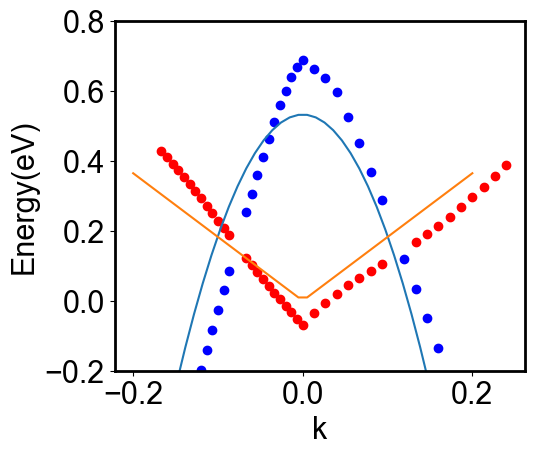

In [150]:
from scipy.optimize import curve_fit

fig=plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,3,1)
ax.scatter(kvv, Ekvv-fermi, color='blue')
ax.scatter(kcc, Ekcc-fermi, color='red')
ax.set_xlabel('k')
ax.set_ylabel('Energy(eV)')
#ax.set_xlim(0.7,1.2)
ax.set_ylim(-0.2,0.8)

#--------------------------------------------------------------------
#Interpolation
#--------------------------------------------------------------------

# Specify the point where you want to determine the value
#dsrd_kvv = 0.91
#dsrd_kcc= 0.912

# Find the corresponding highest y-value
#dsrd_Ekvv = np.interp(dsrd_kvv, kvv, Ekvv-fermi) #interpolation to determine max value of conduction bands
#dsrd_Ekcc = np.interp(dsrd_kcc, kcc, Ekcc-fermi,)

# Mark the point on the graph with an annotation
#ax.scatter(dsrd_kvv, dsrd_Ekvv, color='black')      #Marking the point
#ax.annotate(f'({dsrd_kvv:.2f}, {dsrd_Ekvv:.3f})', #add a text annotation at that point
#             xy=(dsrd_kvv, dsrd_Ekvv),
#             xytext=(dsrd_kvv-0.2, dsrd_Ekvv),
#             arrowprops=dict(facecolor='black', arrowstyle='->'),
#             fontsize='12',
#             )

#ax.scatter(dsrd_kcc, dsrd_Ekcc, color='black')  
#ax.annotate(f'({dsrd_kcc:.2f}, {dsrd_Ekvv:.3f})', 
#             xy=(dsrd_kcc, dsrd_Ekcc),
#             xytext=(dsrd_kcc, dsrd_Ekcc+0.2),
#             arrowprops=dict(facecolor='black', arrowstyle='->'),
#             fontsize='12',
#             )

#print(len(kcc))
#print((kcc[0],Ekcc[0]))
#print((kcc[23],Ekcc[23]))

#--------------------------------------------------------------------
#Curve Fitting
#--------------------------------------------------------------------

#define a function

#Parabolic band
#def DEv(k,q,r,E_0):
#    return -q*k**2+r*k+E_0

def DEv(k,q,E_0):
    return -q*np.abs(k)**2+E_0


#Linear band (left)
#kc_lft=kcc[0:23]
#Ekc_lft=Ekcc[0:23]

#def DEc_lft(k,v_lft,c_lft):
#    return k*v_lft+c_lft

#Linear band (right)
#kc_rgt=kcc[23:40]
#Ekc_rgt=Ekcc[23:40]

#def DEc_rgt(k,v_rgt,c_rgt):
#   return k*v_rgt+c_rgt

#Linear band (total)

def DEc(k,vF):
    return vF*np.abs(k)

#Fitting

#Parabolic band
popt,pcov= curve_fit(DEv, kvv, Ekvv-fermi)
print(popt)

#Linear band (left)
#lft_opt,lft_cov=curve_fit(DEc_lft, kc_lft, Ekc_lft)
#print(lft_opt)

#Linear band (right)
#rgt_opt,rgt_cov=curve_fit(DEc_rgt, kc_rgt, Ekc_rgt)
#print(rgt_opt)

#Parabolic band
c_opt,c_cov= curve_fit(DEc, kcc, Ekcc-fermi)
print(c_opt)

#Plotting fitted parameters
xfit=np.linspace(-0.2, 0.2, 40)
ax.plot(xfit, DEv(xfit, *popt))
ax.plot(xfit, DEc(xfit, *c_opt))
#kcfit_lft=np.linspace(-0.15, 0, 50)
#ax.plot(kcfit_lft, DEc_lft(kcfit_lft, *lft_opt))

#kcfit_rgt=np.linspace(0, 0.15, 50)
#ax.plot(kcfit_rgt, DEc_rgt(kcfit_rgt, *rgt_opt))

